In [ ]:
Pkg.add("ImageSegmentation")

In [ ]:
save("nuclei.png",nuclei)

In [14]:
using Images, ImageSegmentation

┌ Info: Precompiling ImageSegmentation [80713f31-8817-5129-9cf8-209ff8fb23e1]
└ @ Base loading.jl:1189


In [ ]:
img = load("M08B_DAPI_mito_training/images/20X_c0_A1_Site-0.max.tif")

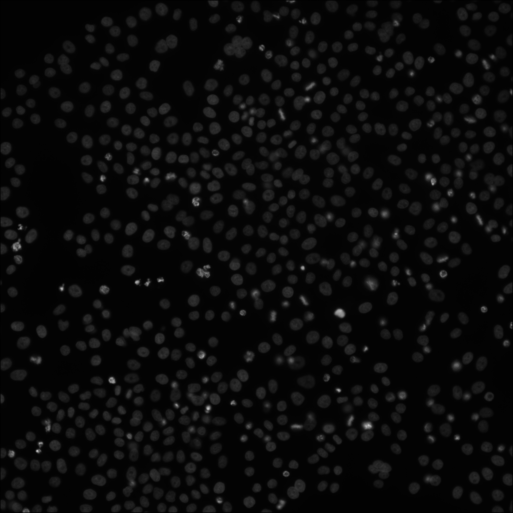

In [16]:
nuclei = img[:,:,1]

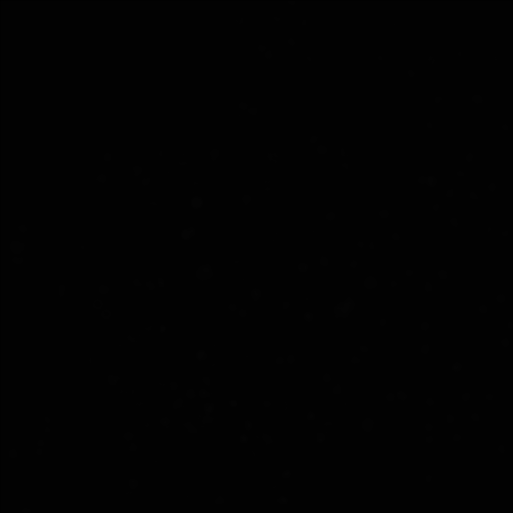

In [65]:
cells = img[:,:,2]

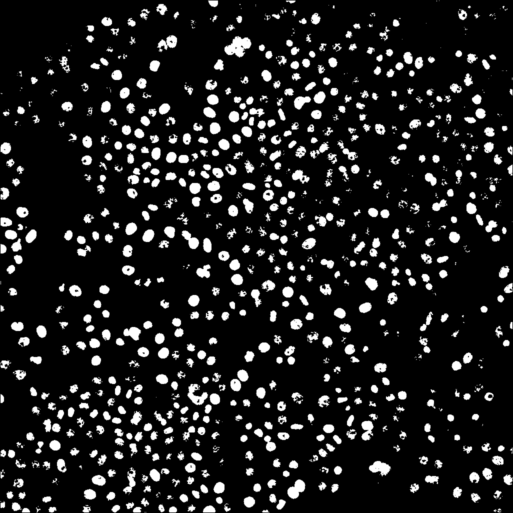

In [173]:
### threshold and view results

farr = convert(Array{Float64},channelview(nuclei))

thresh_nuc = .09000
mask = farr .< thresh_nuc
farr[mask] .= 0
mask2 = farr .>= thresh_nuc
farr[mask2] .= 1

Gray.(farr)

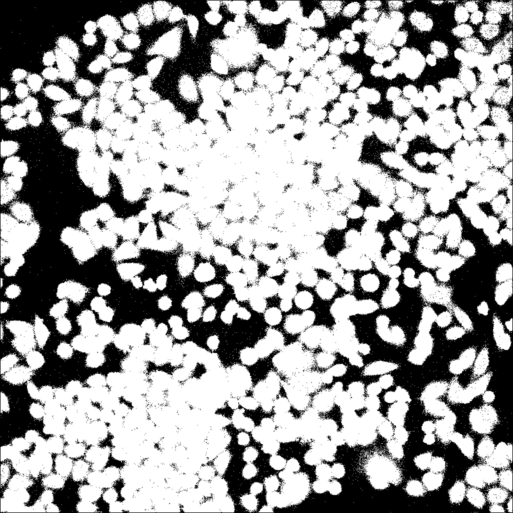

In [174]:
### threshold and view results

farr = convert(Array{Float64},channelview(cells))

thresh_cells = .00690
mask = farr .< thresh_cells
farr[mask] .= 0
mask2 = farr .>= thresh_cells
farr[mask2] .= 1

Gray.(farr)

In [74]:
bw_nuc = Gray.(nuclei) .> thresh_nuc;
bw_cells = Gray.(cells) .> thresh_cells;

In [78]:
using ImageView
dist_cells = distance_transform(feature_transform(bw_cells));
imshow(dist_cells)

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>846: "map(clim-mapped image, inpu…
  "annotations" => 812: "input-266" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 811: "CLim" = CLim{Float64}(0.0, 138.95682782792647) CLim{Fl…

In [79]:
dist_nuc = distance_transform(feature_transform(bw_nuc));
imshow(dist_nuc)

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>883: "map(clim-mapped image, inpu…
  "annotations" => 849: "input-278" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 848: "CLim" = CLim{Float64}(0.0, 142.76203977248295) CLim{Fl…

In [82]:
markers = label_components(dist_nuc .< 2);
imshow(markers)

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>994: "map(clim-mapped image, inpu…
  "annotations" => 960: "input-314" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 959: "CLim" = CLim{RoundingIntegers.RInt64}(0, 708) CLim{Rou…

In [176]:
segments = watershed(dist_cells, markers)
imshow(labels_map(segments))


Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>1105: "map(clim-mapped image, inp…
  "annotations" => 1071: "input-350" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 1070: "CLim" = CLim{RoundingIntegers.RInt64}(1, 708) CLim{Ro…

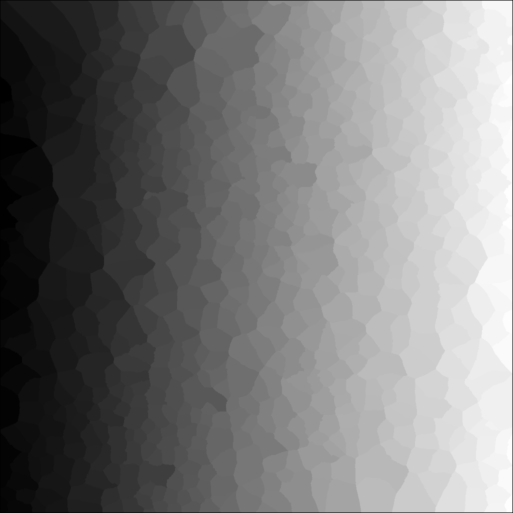

In [177]:
seg_arr = labels_map(segments)
Gray.(seg_arr./maximum(seg_arr))

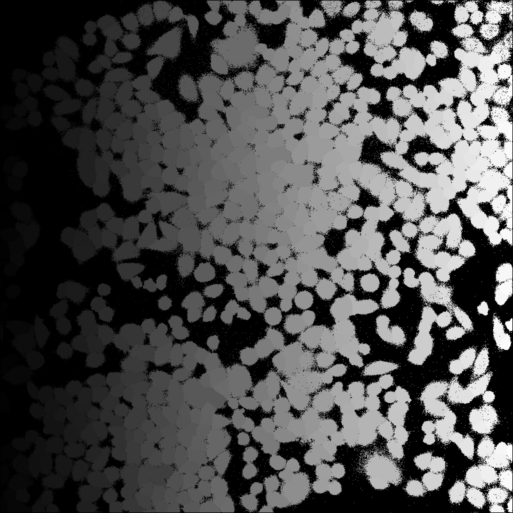

In [178]:
seg_arr = labels_map(segments)
mask = farr .== 0.0
seg_arr[mask] .= 0
seg_arr = seg_arr./maximum(seg_arr).*1 # normalize so no values will be greater than 255
Gray.(seg_arr)

In [183]:
save("small_test/segmented.jpg", Gray. (seg_arr)) 